# Third Analysis Script for Formal Bayesian Model Calibration
### Purpose of the Script
This script reads in the model outputs, specifically the isolation pools from the model runs with the calibrated parameter samples. It then compares the samples to data to see how well our model compares

In [698]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


# Step 1) CSV File Uploads 
First we read in the CSV files we need that contain the data collected from our 10,000 model runs and our surveillance testing data from Rochester Institute of Technology (RIT). The data from our model includes the model isolation pool population at each day for every model run (spring_isolation_pool_vectors and fall_isolation_pool_vectors). The surveillance testing data from RIT  includes surveillance testing data from Fall 2020 (RIT_Fall_Data) and Spring 2021 (RIT_Spring_Data).

In [699]:
# FALL 2020
# Read in needed CSVs
RIT_Fall_Data = pd.read_csv(r'/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/CSVs To Run Model/Simplified_RIT_Data_Fall20.csv')


In [700]:
RIT_Fall_Data

,date,day #,# of tests,# of positive tests,total isolation (RIT provided data),On campus isolation (RIT provided data),total in quarantine,# of students in quarantine on & off campus,# of students in travel quarantine
0,9/19/2020,1,0,0,3,0,30,13,17.0
1,9/21/2020,2,0,0,2,1,22,12,10.0
2,9/22/2020,3,4,0,2,1,26,15,11.0
3,9/23/2020,4,225,0,2,1,28,14,14.0
4,9/24/2020,5,74,0,1,0,8,8,NaN
...,...,...,...,...,...,...,...,...,...
62,11/21/2020,63,78,2,10,5,31,23,8.0
63,11/22/2000,64,0,3,11,5,26,19,7.0
64,11/23/2020,65,0,2,13,5,29,24,5.0
65,11/24/2020,66,106,0,17,6,26,22,4.0


In [701]:
# plt.bar(np.arange(1, N+1), RIT_Fall_Data['pos_test_results_day'], color = 'blue', alpha = 0.5, label = 'Positive Tests' )
# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
# plt.title('Model Experiment Data', fontsize = 20)
# plt.ylabel('Tests',fontsize = 16 )
# plt.xlabel('Days', fontsize = 16 )
# plt.legend(fontsize=16)

In [702]:
# plt.bar(np.arange(1, N+1), RIT_Fall_Data['isolation_pool'], color = 'orange',label = 'Isolation Population' )
# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
# plt.title('Model Experiment Data', fontsize = 20)
# plt.ylabel('People',fontsize = 16 )
# plt.xlabel('Days', fontsize = 16 )
# plt.legend(fontsize=16)

We also need to make a list of column names for when we read in the isolation pool vectors so they do not delete the first row as it normally is read in as a header and deleted.

In [703]:
N = len(RIT_Fall_Data.iloc[:,0]) 
column_names = ['day_num_' + str(i + 1) for i in range(N)]

In [704]:
# FALL 2020
# Read in needed CSVs

fall_isolation_pool_vectors = pd.read_csv(r'/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/Outputs from Model Runs with Calibrated Params/std weighting ll multiply 2 sept 2/Fall_isolation_pool_df_all_params_FLF_100_sims_10_samples_rit_data_new_std_weighting_ll_multiple_2_sep_24.csv', names = column_names)
fall_num_pos_test_vector = pd.read_csv(r'/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/Outputs from Model Runs with Calibrated Params/std weighting ll multiply 2 sept 2/Fall_positive_test_per_day_df_all_params_FLF_100_sims_10_samples_rit_data_new_std_weighting_ll_multiple_2_sep_24.csv',  names = column_names)
fall_num_false_pos_test_vector = pd.read_csv(r'/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/Outputs from Model Runs with Calibrated Params/std weighting ll multiply 2 sept 2/Fall_false_positive_test_per_day_df_all_params_FLF_100_sims_10_samples_rit_data_new_std_weighting_ll_multiple_2_sep_24.csv', names = column_names)
fall_num_true_pos_test_vector = pd.read_csv(r'/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/Outputs from Model Runs with Calibrated Params/std weighting ll multiply 2 sept 2/Fall_true_positive_test_per_day_df_all_params_FLF_100_sims_10_samples_rit_data_new_std_weighting_ll_multiple_2_sep_24.csv', names = column_names)


In [705]:
len(fall_num_pos_test_vector.iloc[:,0])

10000

Then we print to visually check

In [706]:
fall_isolation_pool_vectors

,day_num_1,day_num_2,day_num_3,day_num_4,day_num_5,day_num_6,day_num_7,day_num_8,day_num_9,day_num_10,...,day_num_58,day_num_59,day_num_60,day_num_61,day_num_62,day_num_63,day_num_64,day_num_65,day_num_66,day_num_67
0,1.603764,1.607433,1.606582,1.899123,2.389484,2.827267,2.768466,1.932053,1.679916,1.601557,...,5.763277,7.704825,9.682818,9.371483,13.795217,15.746266,10.067539,8.093224,7.622716,7.895712
1,1.081461,1.066365,1.048167,1.028386,1.008144,0.988258,0.969314,0.951729,0.935783,0.922163,...,7.911389,8.674753,11.726789,15.049498,17.687740,17.963769,13.236599,11.260187,11.218658,11.580640
2,0.814912,0.795467,0.773887,1.343661,1.718427,1.294511,1.263871,0.831623,0.688884,0.641204,...,5.581837,6.080948,7.746663,9.470570,11.994789,12.545835,8.969700,7.186513,7.345609,8.018763
3,1.215802,1.216657,1.214120,1.505423,1.697880,1.341678,1.229792,1.190150,1.171943,1.160252,...,8.008731,9.702194,12.132200,13.821590,15.868090,14.510971,11.567704,10.475884,10.340256,11.082308
4,0.624138,0.682429,0.727909,1.356337,1.783517,1.110158,0.922699,0.877521,0.873823,0.888979,...,6.975077,7.085547,8.164724,11.658095,15.340954,13.974862,10.073100,9.070529,8.935395,9.658879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.312629,1.316428,1.315180,1.310700,1.304326,1.297035,1.289536,1.282337,1.276185,1.276924,...,6.163512,8.564054,11.210697,10.999772,14.392825,14.588626,9.493768,8.101347,8.406155,8.858811
9996,0.258052,0.325764,0.385021,0.733603,0.979315,0.672683,0.607010,0.610533,0.633164,0.667083,...,6.550020,7.290323,9.052799,12.609847,16.386398,14.303322,9.747197,8.517958,8.280171,8.341924
9997,2.749496,2.628266,2.509161,2.986084,3.273178,2.470113,2.162821,2.014320,1.924912,1.861449,...,6.889997,8.508317,11.752487,13.674149,14.098013,12.779449,10.297792,8.864113,9.440916,10.659795
9998,3.682681,3.459433,3.249106,3.051467,2.866166,2.692769,2.530787,2.380344,2.250445,2.143639,...,8.926780,10.932216,13.310886,13.318951,15.736439,16.478819,12.959342,11.723176,11.875305,12.261874


In [707]:
fall_num_pos_test_vector

,day_num_1,day_num_2,day_num_3,day_num_4,day_num_5,day_num_6,day_num_7,day_num_8,day_num_9,day_num_10,...,day_num_58,day_num_59,day_num_60,day_num_61,day_num_62,day_num_63,day_num_64,day_num_65,day_num_66,day_num_67
0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,6.0,2.0,4.0,16.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,8.0,7.0,13.0,2.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,4.0,5.0,10.0,2.0,0.0,0.0,2.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,4.0,8.0,7.0,1.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,9.0,9.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,3.0,6.0,13.0,0.0,0.0,0.0,2.0,0.0
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,4.0,11.0,10.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,7.0,7.0,6.0,2.0,0.0,0.0,3.0,2.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,3.0,4.0,10.0,1.0,0.0,0.0,1.0,0.0


In [708]:
fall_num_false_pos_test_vector

,day_num_1,day_num_2,day_num_3,day_num_4,day_num_5,day_num_6,day_num_7,day_num_8,day_num_9,day_num_10,...,day_num_58,day_num_59,day_num_60,day_num_61,day_num_62,day_num_63,day_num_64,day_num_65,day_num_66,day_num_67
0,0.0,0.0,0.0,0.998338,0.998382,1.996820,0.0,0.0,0.0,0.0,...,0.0,5.943125,1.980479,3.959933,15.835899,0.989516,0.0,0.0,0.000000,0.988669
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.977306,7.905854,6.914712,12.836265,1.973988,0.0,0.0,0.985499,0.000000
2,0.0,0.0,0.0,1.998981,0.000000,0.999550,0.0,0.0,0.0,0.0,...,0.0,1.985448,3.970039,4.961628,9.921668,1.984058,0.0,0.0,1.983247,0.991363
3,0.0,0.0,0.0,0.999234,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,4.956878,3.964875,7.928582,6.935875,0.990497,0.0,0.0,0.000000,1.978908
4,0.0,0.0,0.0,1.997728,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,2.971531,8.912013,8.909575,0.000000,0.0,0.0,0.000000,1.977023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,7.921827,2.969773,5.937901,12.862141,0.000000,0.0,0.0,1.976808,0.000000
9996,0.0,0.0,0.0,0.999135,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.987363,3.974011,10.926815,9.932102,0.000000,0.0,0.0,0.000000,0.000000
9997,0.0,0.0,0.0,1.998157,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,4.959432,6.942201,6.941343,5.948706,1.982441,0.0,0.0,2.972121,1.981153
9998,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,5.953633,2.976063,3.967172,9.915822,0.991385,0.0,0.0,0.990657,0.000000


# Step 2) Visual Check of the Data
Here we print a preview of the surveillance testing data to visually ensure the format is correct and isolate the column of the data we will be using.

In [709]:
# Display testing to verify form
RIT_Fall_Data

,date,day #,# of tests,# of positive tests,total isolation (RIT provided data),On campus isolation (RIT provided data),total in quarantine,# of students in quarantine on & off campus,# of students in travel quarantine
0,9/19/2020,1,0,0,3,0,30,13,17.0
1,9/21/2020,2,0,0,2,1,22,12,10.0
2,9/22/2020,3,4,0,2,1,26,15,11.0
3,9/23/2020,4,225,0,2,1,28,14,14.0
4,9/24/2020,5,74,0,1,0,8,8,NaN
...,...,...,...,...,...,...,...,...,...
62,11/21/2020,63,78,2,10,5,31,23,8.0
63,11/22/2000,64,0,3,11,5,26,19,7.0
64,11/23/2020,65,0,2,13,5,29,24,5.0
65,11/24/2020,66,106,0,17,6,26,22,4.0


# Step 3) Clean up, Format, and Isolate the Data We Need
Here we look at the data we have collected from our model and format it to run smoothly with the rest of our code.

In [710]:
RIT_Fall_Data

,date,day #,# of tests,# of positive tests,total isolation (RIT provided data),On campus isolation (RIT provided data),total in quarantine,# of students in quarantine on & off campus,# of students in travel quarantine
0,9/19/2020,1,0,0,3,0,30,13,17.0
1,9/21/2020,2,0,0,2,1,22,12,10.0
2,9/22/2020,3,4,0,2,1,26,15,11.0
3,9/23/2020,4,225,0,2,1,28,14,14.0
4,9/24/2020,5,74,0,1,0,8,8,NaN
...,...,...,...,...,...,...,...,...,...
62,11/21/2020,63,78,2,10,5,31,23,8.0
63,11/22/2000,64,0,3,11,5,26,19,7.0
64,11/23/2020,65,0,2,13,5,29,24,5.0
65,11/24/2020,66,106,0,17,6,26,22,4.0


In [711]:
# FALL 2020
# isolate isolation pool and positive tests for comparison
# fall_RIT_iso_pool = RIT_Fall_Data['isolation pool'] 
# fall_RIT_pos_test = RIT_Fall_Data['positive test results']
fall_RIT_iso_pool = RIT_Fall_Data['total isolation (RIT provided data)'] 
fall_RIT_pos_test = RIT_Fall_Data['# of positive tests']

In [712]:
fall_RIT_iso_pool

0      3
1      2
2      2
3      2
4      1
      ..
62    10
63    11
64    13
65    17
66    16
Name: total isolation (RIT provided data), Length: 67, dtype: int64

In [713]:
fall_RIT_pos_test

0     0
1     0
2     0
3     0
4     0
     ..
62    2
63    3
64    2
65    0
66    0
Name: # of positive tests, Length: 67, dtype: int64

In [714]:
len(fall_isolation_pool_vectors.iloc[0,:])

67

In [715]:
len(fall_num_pos_test_vector.iloc[0,:])

67

# Step 4) Define Percentiles We Want
Now we define the percentiles of the model isolation pool we want and their corresponding labels. Here we want to look at the 5th, 50th, and 95th percentiles

In [716]:
percentiles = [5, 50, 95]
percentile_labels = [str(x) + 'th Percentile' for x in percentiles]

# Step 5) Calculate the percentiles we need
Here we take the data from our model, in this case it is the isolation pool per day and find the relative percentiles

First we define a lambda function that uses np.percentile() to calculate the percentile we are looking for.

In [717]:
percentile_calc = lambda percentile, model_output: np.percentile(model_output, percentile)

Then we define a general function that takes the model isolation pool data from all 10,000 runs for the fall and spring semesters and calculates all the percentiles of interest for that semester. Then it saves them in a data frame with the corresponding percentile labels. In this data frame each column corresponds to a specific percentile and each row is the percentile of the model isolation pool for that model run.

In [718]:
def selected_percentiles(model_output_all, percentile_vector, labels):
    
    # First we pull the number of model runs from our data and number of percentiles we are calculating from our inputs
    num_model_runs = len(model_output_all.iloc[0,:]) 
    num_percentiles = len(percentiles)if hasattr(percentiles,"__len__") else 1 # could be only 1 so we account for that possibility
    
    # First we make a numpy array with the number of rows that there are model runs and a column for each percentile we want.
    selected_percentiles_output = np.zeros((num_model_runs, num_percentiles))

    # Then we cycle through each model run and calculate all the percentiles for that model run
    for i in range(len(model_output_all.iloc[0,:])): # cycles through each model run
            selected_percentiles_output[i,:] = percentile_calc(percentile_vector, model_output_all.iloc[:,i])
    
    # Then we store the resulting percentile values for each model run in a data frame
    selected_percentiles_output_df = pd.DataFrame(selected_percentiles_output, columns = labels)  
    
    # Returns the dataframe of percentile values
    return(selected_percentiles_output_df)



Then we use these functions to calculate the data frame of the percentile values for each model run for each semester.

In [719]:
# spring_percentiles = selected_percentiles(spring_isolation_pool_vectors, percentiles, percentile_labels)
fall_percentiles_iso_pop = selected_percentiles(fall_isolation_pool_vectors, percentiles, percentile_labels)
fall_percentiles_pos_test = selected_percentiles(fall_num_pos_test_vector, percentiles, percentile_labels)
fall_percentiles_false_pos_test = selected_percentiles(fall_num_false_pos_test_vector, percentiles, percentile_labels)
fall_percentiles_true_pos_test = selected_percentiles(fall_num_true_pos_test_vector, percentiles, percentile_labels)



In [720]:
fall_isolation_pool_vectors.iloc[1,:]

day_num_1      1.081461
day_num_2      1.066365
day_num_3      1.048167
day_num_4      1.028386
day_num_5      1.008144
                ...    
day_num_63    17.963769
day_num_64    13.236599
day_num_65    11.260187
day_num_66    11.218658
day_num_67    11.580640
Name: 1, Length: 67, dtype: float64

In [721]:
np.percentile(fall_isolation_pool_vectors.iloc[:,66], 50)

9.381527326038091

In [722]:
fall_isolation_pool_vectors.iloc[:,1]

0       1.607433
1       1.066365
2       0.795467
3       1.216657
4       0.682429
          ...   
9995    1.316428
9996    0.325764
9997    2.628266
9998    3.459433
9999    2.169477
Name: day_num_2, Length: 10000, dtype: float64

Then we print one of these data frames to visually check.

In [723]:
fall_percentiles_iso_pop

,5th Percentile,50th Percentile,95th Percentile
0,0.203630,1.213925,2.660650
1,0.278489,1.213753,2.553606
2,0.344745,1.211026,2.446237
3,0.464212,1.330192,2.510174
4,0.520112,1.438025,2.672720
...,...,...,...
62,10.527651,13.941154,17.896047
63,7.853635,10.187486,12.803527
64,6.804266,8.946559,11.350433
65,6.717554,8.980394,11.478158


In [724]:
fall_percentiles_pos_test

,5th Percentile,50th Percentile,95th Percentile
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,2.0
4,0.0,0.0,1.0
...,...,...,...
62,0.0,0.0,2.0
63,0.0,0.0,0.0
64,0.0,0.0,0.0
65,0.0,1.0,3.0


In [725]:
fall_percentiles_pos_test

,5th Percentile,50th Percentile,95th Percentile
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,2.0
4,0.0,0.0,1.0
...,...,...,...
62,0.0,0.0,2.0
63,0.0,0.0,0.0
64,0.0,0.0,0.0
65,0.0,1.0,3.0


# Step 6) Visualize the Comparison of Model to the RIT Data

Here we visualize the  outputs of our calibrated model to our RIT data. We first create vectors based on the number of days in each semeste. Then we graph the following against our day vectors. First id our RIT isolation pool per day data which we graph as a bar graph (orange bars). Then we overlay the 5th, 50th, and 95th percentiles of our model isolation population over 10,000 runs. The 5th (bottom) and 95th (top) percentiles display as the dotted lines and the median or 50th percentile displays as the solid black line. We then save our finished figure to our desktop as a pdf. 

In [726]:
# num_days_S = len(spring_isolation_pool_vectors.iloc[0,:]) # finds number of days per semester
num_days_F = len(fall_isolation_pool_vectors.iloc[0,:]) # finds number of days per semester
# days_S = np.linspace(1, num_days_S, num_days_S ) # creates vector of days to graph against
days_F = np.linspace(1, num_days_F, num_days_F ) # creates vector of days to graph against

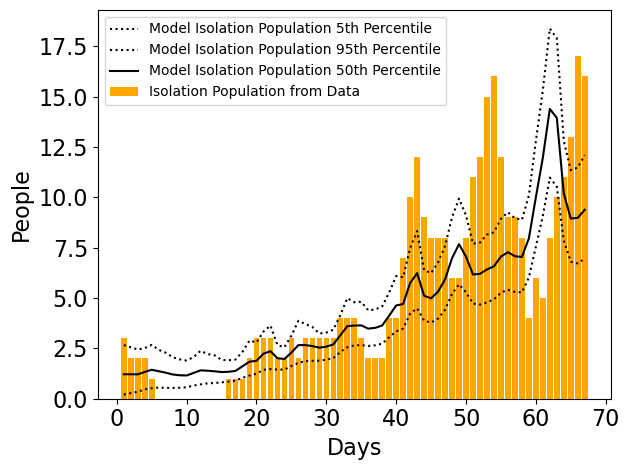

In [727]:
plt.plot(days_F, fall_percentiles_iso_pop['5th Percentile'], 'k:')
plt.plot(days_F, fall_percentiles_iso_pop['95th Percentile'], 'k:')
plt.plot(days_F, fall_percentiles_iso_pop['50th Percentile'], 'k-')
plt.bar(days_F, RIT_Fall_Data.iloc[:,4], color = 'orange')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('People',fontsize = 16 )
plt.xlabel('Days', fontsize = 16 )
plt.legend(['Model Isolation Population 5th Percentile', 'Model Isolation Population 95th Percentile', 'Model Isolation Population 50th Percentile','Isolation Population from Data'])

plt.tight_layout()
# plt.savefig(r'/Users/meghanchilds/Desktop/Fall_Semester20_Model_Data_Comp_Iso_Pool_init_infect.pdf')

In [728]:
fall_percentiles_pos_test

,5th Percentile,50th Percentile,95th Percentile
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,2.0
4,0.0,0.0,1.0
...,...,...,...
62,0.0,0.0,2.0
63,0.0,0.0,0.0
64,0.0,0.0,0.0
65,0.0,1.0,3.0


In [729]:
fall_percentiles_pos_test.iloc[:25,2]

0     0.0
1     0.0
2     0.0
3     2.0
4     1.0
5     1.0
6     0.0
7     0.0
8     0.0
9     0.0
10    2.0
11    1.0
12    1.0
13    0.0
14    0.0
15    0.0
16    0.0
17    2.0
18    1.0
19    2.0
20    3.0
21    0.0
22    0.0
23    0.0
24    3.0
Name: 95th Percentile, dtype: float64

In [730]:
days_F[:25]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [731]:
max(fall_percentiles_pos_test['95th Percentile'])

15.0

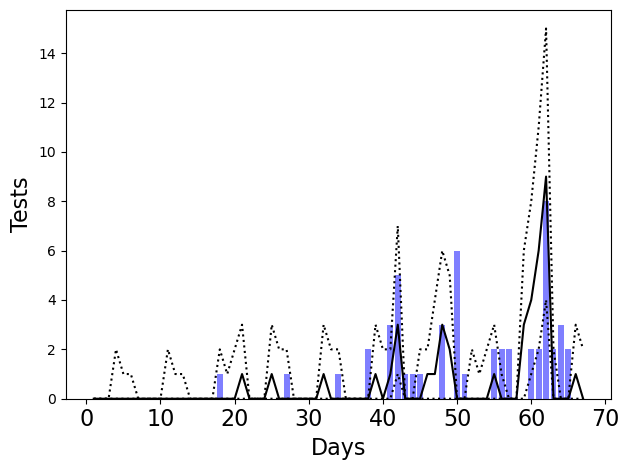

In [732]:
yaxis = np.arange(0, 100, 2.5)
plt.plot(days_F, fall_percentiles_pos_test['5th Percentile'], 'k:')
plt.plot(days_F, fall_percentiles_pos_test['95th Percentile'], 'k:')
plt.plot(days_F, fall_percentiles_pos_test['50th Percentile'], 'k-')
plt.bar(days_F, RIT_Fall_Data.iloc[:,3], color = 'blue', alpha = 0.5)
plt.xticks(fontsize = 16)
plt.ylabel('Tests',fontsize = 16 )
plt.xlabel('Days', fontsize = 16 )
# plt.yticks(ticks = yaxis)
# plt.ylim([0,2.5])
plt.tight_layout()
# plt.ylim([0,10])
# plt.savefig(r'/Users/meghanchilds/Desktop/Fall_Semester20_Model_Data_Comp_Pos_Test_init_infect.pdf')

Text(0.5, 0, 'Days')

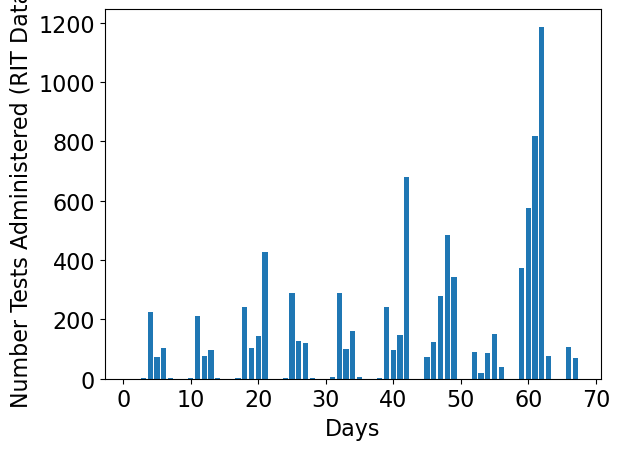

In [733]:
plt.bar(days_F, RIT_Fall_Data.iloc[:,2])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Number Tests Administered (RIT Data)',fontsize = 16 )
plt.xlabel('Days', fontsize = 16 )
# plt.savefig(r'/Users/meghanchilds/Desktop/Fall_Semester20_RIT_Data_Num_Test.pdf')

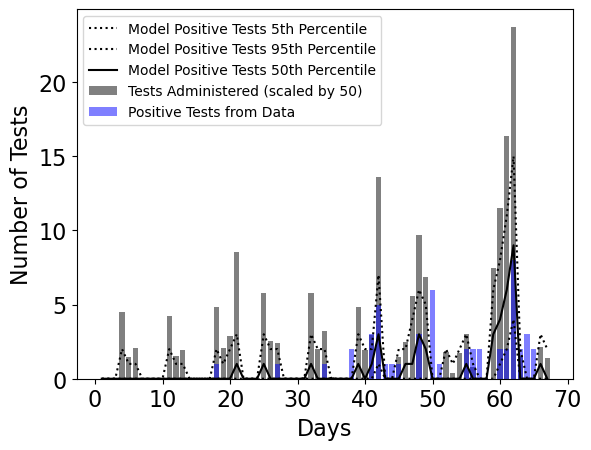

In [734]:
plt.bar(days_F, RIT_Fall_Data.iloc[:,2]/50, color = 'gray')
plt.bar(days_F, RIT_Fall_Data.iloc[:,3], color = 'blue', alpha =0.5)
plt.plot(days_F, fall_percentiles_pos_test['5th Percentile'], 'k:')
plt.plot(days_F, fall_percentiles_pos_test['95th Percentile'], 'k:')
plt.plot(days_F, fall_percentiles_pos_test['50th Percentile'], 'k-')
# plt.ylim([0,40])
plt.legend([ 'Model Positive Tests 5th Percentile', 'Model Positive Tests 95th Percentile', 'Model Positive Tests 50th Percentile', 'Tests Administered (scaled by 50)', 'Positive Tests from Data',])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# plt.axhline(y=1, linestyle = ':', color = 'r')
plt.ylabel('Number of Tests',fontsize = 16 )
plt.xlabel('Days', fontsize = 16 )
plt.savefig(r'/Users/meghanchilds/Desktop/Fall_Semester20_RIT_Data_All_Comp_Fig_init_infect.pdf')

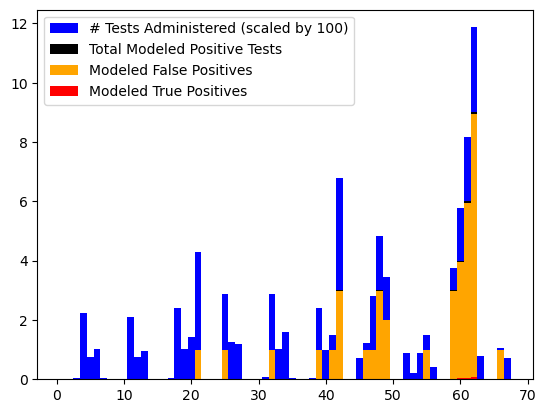

In [735]:
plt.bar(days_F, RIT_Fall_Data.iloc[:,2]/100, width = 1, color = 'blue')
plt.bar(days_F, fall_percentiles_pos_test['50th Percentile'], width = 1, color = 'black')
plt.bar(days_F, fall_percentiles_false_pos_test['50th Percentile'], width = 1, color = 'orange')
plt.bar(days_F, fall_percentiles_true_pos_test['50th Percentile'],width = 1, color = 'red')
#plt.ylim([0,0.025])
# plt.bar(days_F, RIT_Fall_Data.iloc[:,3], width =1.5, color = 'black', alpha = 0.5)
plt.legend(['# Tests Administered (scaled by 100)', 'Total Modeled Positive Tests', 'Modeled False Positives', 'Modeled True Positives'])

In [736]:
# plt.bar(days_S, spring_RIT_iso_pool, color='orange')
# plt.plot(days_S, spring_percentiles['5th Percentile'], 'k:')
# plt.plot(days_S, spring_percentiles['95th Percentile'], 'k:')
# plt.plot(days_S, spring_percentiles['50th Percentile'], 'k-')
# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
# plt.ylabel('People',fontsize = 16 )
# plt.xlabel('Days', fontsize = 16 )
# plt.tight_layout()
# plt.savefig(r'/Users/meghanchilds/Desktop/Spring_Semester21_Model_Data_Comp_Demo.pdf')

## Maximum a Posteriori Plot w/ 10 Randomly Sampled Simulation

In [737]:
analysis_samples_df = pd.read_csv(r'/Users/meghanchilds/Desktop/Dissertation_Research/COVID-19-Model-Formal-Calibration/MCMC CSV Files/Calibrated Parameters/Fall_Samples_For_Analysis_FLF_1000_sims_new_std_weight_LL_multiply_2_sep_24.csv')     
del analysis_samples_df['Unnamed: 0']
analysis_samples_df


,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Init Infect,Initial Iso,Iter,Rand Seed
0,11.0,17.919503,10.382535,1.406476,0.007785,5.664979,0.769985,1.231553,10.0,15.0,1.601469,158277.0,379.0
1,9.0,13.280190,11.670056,1.659497,0.007664,7.391168,0.810907,1.238100,10.0,7.0,1.085686,124344.0,203.0
2,8.0,12.142009,10.843432,1.128705,0.004022,10.669401,0.847111,1.231385,16.0,5.0,0.820871,216275.0,725.0
3,10.0,18.807700,15.491471,1.295773,0.004100,7.838105,0.807751,1.232766,15.0,7.0,1.214756,95051.0,443.0
4,8.0,12.153332,11.546552,1.420458,0.001555,8.309952,0.744533,1.238869,10.0,11.0,0.601880,338182.0,725.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.0,15.240355,9.947896,1.372230,0.000644,5.551480,0.797569,1.233979,8.0,13.0,1.310149,130987.0,379.0
9996,8.0,17.581023,16.121232,1.200505,0.008087,7.829960,0.748682,1.230239,9.0,8.0,0.233709,351889.0,443.0
9997,6.0,12.499513,12.337279,1.100604,0.001958,9.629255,0.778321,1.229182,12.0,9.0,2.790106,245976.0,725.0
9998,7.0,13.515314,17.242674,1.353102,0.001183,9.671869,0.825709,1.242163,11.0,3.0,3.759505,25246.0,725.0


### Isolating the MAP Simulation

In [738]:
MAP_iter =   121370.0

MAP_rand_seed = 443.0

MAP_iter


121370.0

In [739]:
MAP_sim = analysis_samples_df[analysis_samples_df['Iter'] == MAP_iter]




In [740]:
MAP_sim





,Freq Es,Time to Recovery,Percent Advancing,Rt,Symptom Case Fatality,Days to Incubation,Test Sensitivity,Test Specificity,New Infect,Init Infect,Initial Iso,Iter,Rand Seed
2317,7.0,13.963311,13.996349,1.132202,0.000683,7.021061,0.834612,1.235956,11.0,8.0,1.55339,121370.0,443.0


In [741]:
MAP_sim_final = MAP_sim[MAP_sim['Rand Seed']== MAP_rand_seed]
float(MAP_sim_final['New Infect'])


/var/folders/7d/pq2z223x78gfz9npz67q9vqw0000gn/T/ipykernel_48813/1298156719.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(MAP_sim_final['New Infect'])


11.0

In [742]:
MAP_index = MAP_sim_final.index
MAP_index[0]

2317

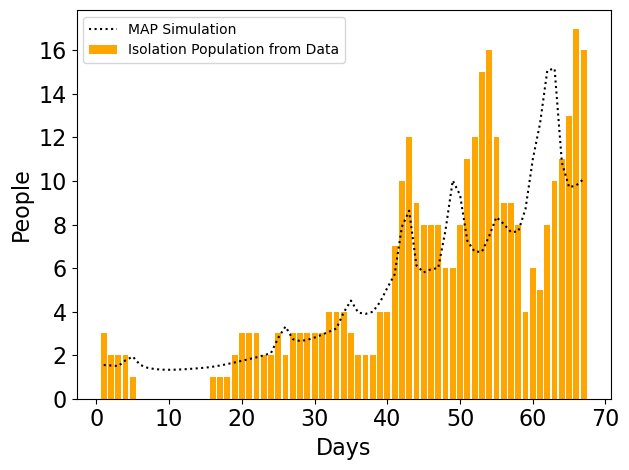

In [743]:
plt.plot(days_F, fall_isolation_pool_vectors.loc[MAP_index[0]], 'k:')
# plt.plot(days_F, fall_percentiles_iso_pop['95th Percentile'], 'k:')
# plt.plot(days_F, fall_percentiles_iso_pop['50th Percentile'], 'k-')
plt.bar(days_F, RIT_Fall_Data.iloc[:,4], color = 'orange')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('People',fontsize = 16 )
plt.xlabel('Days', fontsize = 16 )
plt.legend(['MAP Simulation','Isolation Population from Data'])

plt.tight_layout()

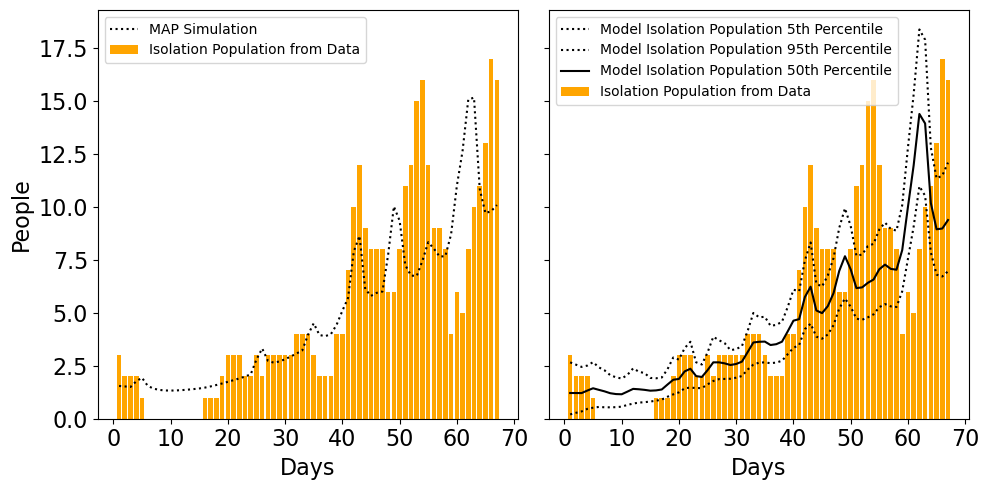

In [744]:

plt.subplots(1,2, sharex=True, sharey=True, figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(days_F, fall_isolation_pool_vectors.loc[MAP_index[0]], 'k:')
# plt.plot(days_F, fall_percentiles_iso_pop['95th Percentile'], 'k:')
# plt.plot(days_F, fall_percentiles_iso_pop['50th Percentile'], 'k-')
plt.bar(days_F, RIT_Fall_Data.iloc[:,4], color = 'orange')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('People',fontsize = 16 )
plt.xlabel('Days', fontsize = 16 )
plt.legend(['MAP Simulation','Isolation Population from Data'], loc = 'upper left')
plt.annotate('A', (66, 71), fontsize=16)


plt.subplot(1,2,2)
plt.plot(days_F, fall_percentiles_iso_pop['5th Percentile'], 'k:')
plt.plot(days_F, fall_percentiles_iso_pop['95th Percentile'], 'k:')
plt.plot(days_F, fall_percentiles_iso_pop['50th Percentile'], 'k-')
plt.bar(days_F, RIT_Fall_Data.iloc[:,4], color = 'orange')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# plt.ylabel('People',fontsize = 16 )
plt.annotate('B', (66, 71), fontsize=16)

plt.xlabel('Days', fontsize = 16 )
plt.legend(['Model Isolation Population 5th Percentile', 'Model Isolation Population 95th Percentile', 'Model Isolation Population 50th Percentile','Isolation Population from Data'], loc = 'upper left')

plt.tight_layout()

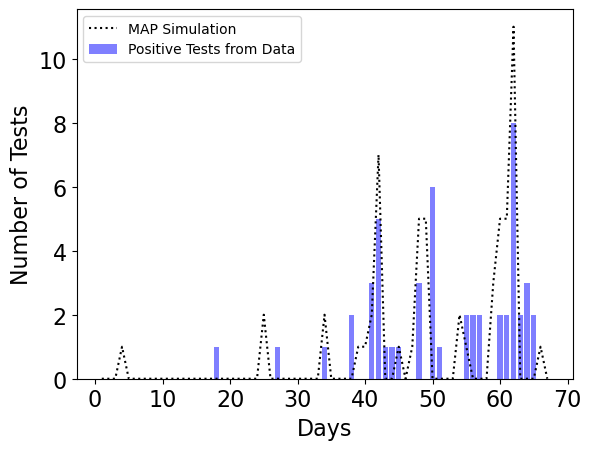

In [745]:
plt.bar(days_F, RIT_Fall_Data.iloc[:,3], color = 'blue', alpha =0.5)
plt.plot(days_F, fall_num_pos_test_vector.loc[MAP_index[0]], 'k:')

# plt.ylim([0,40])
plt.legend([ ])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# plt.axhline(y=1, linestyle = ':', color = 'r')
plt.ylabel('Number of Tests',fontsize = 16 )
plt.xlabel('Days', fontsize = 16 )
plt.legend(['MAP Simulation','Positive Tests from Data'])



# plt.savefig(r'/Users/meghanchilds/Desktop/Fall_Semester20_RIT_Data_All_Comp_Fig_init_infect.pdf')



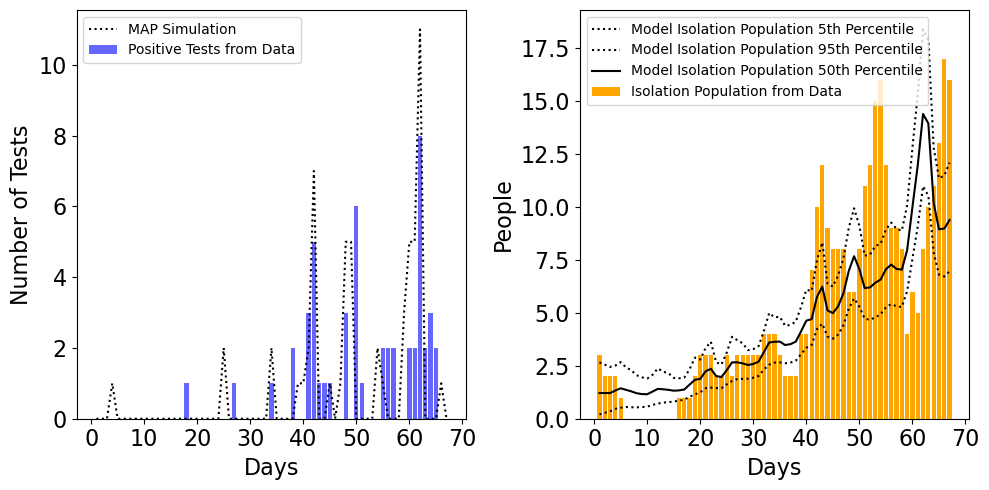

In [746]:
plt.subplots(1,2, sharex=True, sharey=False, figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(days_F, RIT_Fall_Data.iloc[:,3], color = 'blue', alpha =0.6)
plt.plot(days_F, fall_num_pos_test_vector.loc[MAP_index[0]], 'k:')
# plt.ylim([0,40])
plt.legend([ ])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.annotate('A', (66,18), fontsize = 16)
# plt.axhline(y=1, linestyle = ':', color = 'r')
plt.ylabel('Number of Tests',fontsize = 16 )
plt.xlabel('Days', fontsize = 16 )
plt.legend(['MAP Simulation','Positive Tests from Data'])

plt.subplot(1,2,2)
plt.plot(days_F, fall_percentiles_iso_pop['5th Percentile'], 'k:')
plt.plot(days_F, fall_percentiles_iso_pop['95th Percentile'], 'k:')
plt.plot(days_F, fall_percentiles_iso_pop['50th Percentile'], 'k-')
plt.bar(days_F, RIT_Fall_Data.iloc[:,4], color = 'orange')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('People',fontsize = 16 )
plt.xlabel('Days', fontsize = 16 )
plt.legend(['Model Isolation Population 5th Percentile', 'Model Isolation Population 95th Percentile', 'Model Isolation Population 50th Percentile','Isolation Population from Data'], loc = 'upper left')
plt.annotate('B', (66.5, 120), fontsize=16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# plt.axhline(y=1, linestyle = ':', color = 'r')
plt.xlabel('Days', fontsize = 16 )
plt.tight_layout()

In [747]:
np.sqrt(np.mean((np.array(RIT_Fall_Data.iloc[:,3])-np.array(fall_num_pos_test_vector.loc[MAP_index[0]]))**2))

1.5209973161780712

In [748]:
np.sqrt(np.mean((np.array(RIT_Fall_Data.iloc[:,4])-np.array(fall_isolation_pool_vectors.loc[MAP_index[0]]))**2))

2.955002373808001

In [749]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(np.array(RIT_Fall_Data.iloc[:,4]),fall_isolation_pool_vectors.loc[MAP_index[0]])

In [91]:
RIT_Fall_Data

,Unnamed: 0,day,tests administered,pos_test_results_day,isolation_pool,models proba of a pos test
0,0,1.0,0.000000,0.000000,3.022041,0.001766
1,1,2.0,0.000000,0.000000,3.072965,0.002580
2,2,3.0,4.000000,0.010080,3.105304,0.002520
3,3,4.0,225.000000,0.556978,3.294867,0.002475
4,4,5.0,74.000000,0.180061,3.536239,0.002433
...,...,...,...,...,...,...
62,62,63.0,78.000000,0.801541,62.763570,0.010276
63,63,64.0,0.000000,0.000000,60.565727,0.010555
64,64,65.0,0.000000,0.000000,58.680399,0.011109
65,65,66.0,106.000000,1.229400,57.638751,0.011598


In [99]:
np.mean((np.array(RIT_Fall_Data.iloc[:,4])-np.array(fall_isolation_pool_vectors.loc[MAP_index[0]]))**2)

16.41946942663764

In [95]:
max(np.array(RIT_Fall_Data.iloc[:,4]))

62.76357015657441

In [124]:
np.array(RIT_Fall_Data.iloc[:,3])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 3, 5, 1, 1,
       1, 0, 0, 3, 0, 6, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 8, 2, 3, 2, 0,
       0])

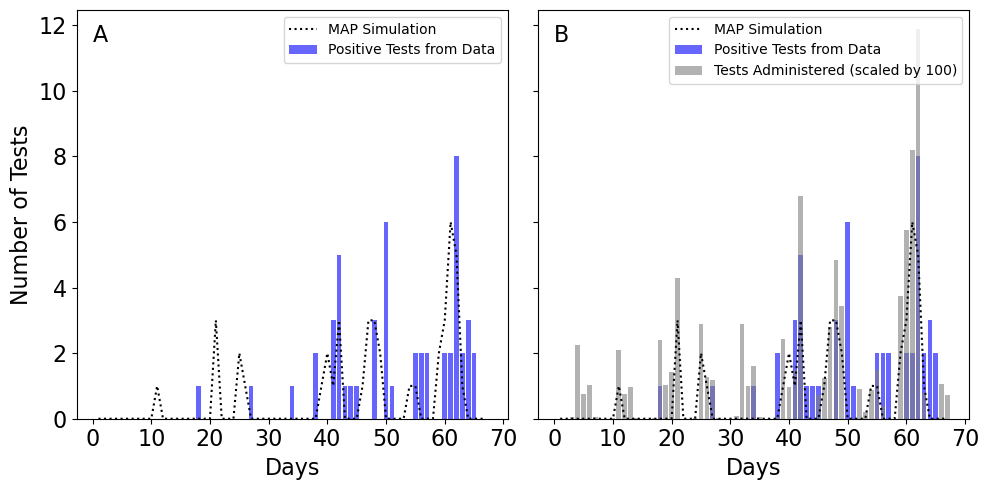

In [125]:
plt.subplots(1,2, sharex=True, sharey=True, figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(days_F, RIT_Fall_Data.iloc[:,3], color = 'blue', alpha =0.6)
plt.plot(days_F, fall_num_pos_test_vector.loc[MAP_index[0]], 'k:')
# plt.ylim([0,40])
plt.legend([ ])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.annotate('A', (0,11.5), fontsize = 16)
# plt.axhline(y=1, linestyle = ':', color = 'r')
plt.ylabel('Number of Tests',fontsize = 16 )
plt.xlabel('Days', fontsize = 16 )
plt.legend(['MAP Simulation','Positive Tests from Data'])

plt.subplot(1,2,2)
plt.plot(days_F, fall_num_pos_test_vector.loc[MAP_index[0]], 'k:')
plt.bar(days_F, RIT_Fall_Data.iloc[:,3], color = 'blue', alpha =0.6)

plt.bar(days_F, RIT_Fall_Data.iloc[:,2]/100, color = 'gray', alpha = 0.6)

# plt.ylim([0,40])
plt.legend(['MAP Simulation', 'Positive Tests from Data', 'Tests Administered (scaled by 100)'], loc='upper right')
plt.annotate('B', (0,11.5), fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# plt.axhline(y=1, linestyle = ':', color = 'r')
plt.xlabel('Days', fontsize = 16 )
plt.tight_layout()

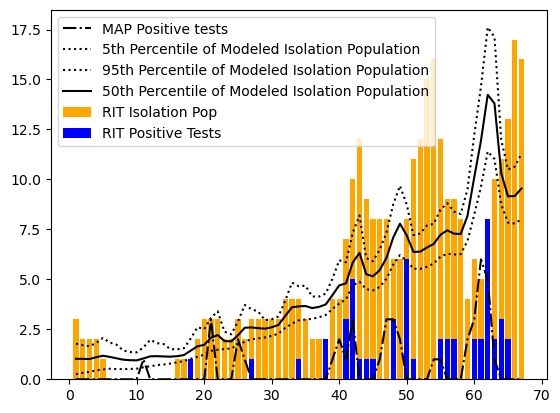

In [133]:
plt.plot(days_F, fall_num_pos_test_vector.loc[MAP_index[0]], 'k-.', label ='MAP Positive tests' )

plt.plot(days_F, fall_percentiles_iso_pop['5th Percentile'], 'k:', label = '5th Percentile of Modeled Isolation Population')
plt.plot(days_F, fall_percentiles_iso_pop['95th Percentile'], 'k:', label = '95th Percentile of Modeled Isolation Population')
plt.plot(days_F, fall_percentiles_iso_pop['50th Percentile'], 'k-', label = '50th Percentile of Modeled Isolation Population')
plt.bar(days_F, RIT_Fall_Data.iloc[:,4], color = 'orange', label ='RIT Isolation Pop')
plt.bar(days_F, RIT_Fall_Data.iloc[:,3], color = 'blue', label = 'RIT Positive Tests')
plt.legend()


# Step 7) Calculate our Surprise Index
Here we need to calculate our surprise index. This index is the percentage of time that that the RIT data falls between the 5th and 95th percentile of the model. To calculate this we first need to find how many times the model is in the 90 percent interval. To do this we loop through the data and check if the data is greater than or equal to the 5th percentile of our data AND less then or equal to our 95th percentile of our data. If the answer is yes we mark this as a success. If it is not we do not mark it as a success.

In [134]:
num_success_F_iso_pool = 0
for i in range (len(RIT_Fall_Data.iloc[:,4])):
    if RIT_Fall_Data.iloc[i,4] <= fall_percentiles_iso_pop['95th Percentile'][i] and RIT_Fall_Data.iloc[i,4] >= fall_percentiles_iso_pop['5th Percentile'][i]:
            num_success_F_iso_pool += 1
     

In [135]:
num_success_F_pos_test = 0
for i in range (len(RIT_Fall_Data.iloc[:,3])):
    if RIT_Fall_Data.iloc[i,3] <= fall_percentiles_pos_test['95th Percentile'][i] and RIT_Fall_Data.iloc[i,3] >= fall_percentiles_pos_test['5th Percentile'][i]:
            num_success_F_pos_test += 1

In [136]:
num_success_F_pos_test

57

In [137]:
# num_success_S = 0
# for i in range (len(RIT_Spring_Data.iloc[:,4])):
#     if RIT_Spring_Data.iloc[i,4] < spring_percentiles['95th Percentile'][i] and RIT_Spring_Data.iloc[i,4] > spring_percentiles['5th Percentile'][i]:
#         num_success_S +=  1

Then to get the surprise index we take the number of successes divided by the total number of data points and multiply it by 100.

In [138]:
percent_in_interval_F_iso_pool = (num_success_F_iso_pool/len(RIT_Fall_Data.iloc[:,4])) * 100
print( 'Our surprise index for the isolation population for the Fall 2020 Semester is approximately' ,int(percent_in_interval_F_iso_pool), 'percent')

Our surprise index for the isolation population for the Fall 2020 Semester is approximately 32 percent


In [139]:
percent_in_interval_F_pos_test = (num_success_F_pos_test/len(RIT_Fall_Data.iloc[:,3])) * 100
print( 'Our surprise index for the positive tests for the Fall 2020 Semester is approximately' ,int(percent_in_interval_F_pos_test), 'percent')

Our surprise index for the positive tests for the Fall 2020 Semester is approximately 85 percent


In [140]:
# percent_in_interval_S = (num_success_S/len(RIT_Spring_Data.iloc[:,4])) * 100
# print( 'Our surprise index for the Spring 2021 Semester is approximately' , int(percent_in_interval_S), 'percent' )